In [1]:
import os
from glob import glob

In [2]:
import librosa
import numpy as np
import pandas as pd
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

In [3]:
import IPython.display as ipd  # To play sound in the notebook

#### Label
##### 'a' = 'anger'
##### 'd' = 'disgust'
##### 'f' = 'fear'
##### 'h' = 'happiness'
##### 'n' = 'neutral'
##### 'sa' = 'sadness'
##### 'su' = 'surprise'

In [4]:
data_paths = glob('speech_emotion_classification_dataset/*.wav')
len(data_paths)

480

In [5]:
data_paths[:20]

['speech_emotion_classification_dataset/JK_sa01.wav',
 'speech_emotion_classification_dataset/JK_sa15.wav',
 'speech_emotion_classification_dataset/DC_n13.wav',
 'speech_emotion_classification_dataset/DC_su09.wav',
 'speech_emotion_classification_dataset/DC_n07.wav',
 'speech_emotion_classification_dataset/JK_n20.wav',
 'speech_emotion_classification_dataset/JK_n08.wav',
 'speech_emotion_classification_dataset/JE_sa08.wav',
 'speech_emotion_classification_dataset/JK_f15.wav',
 'speech_emotion_classification_dataset/JK_f01.wav',
 'speech_emotion_classification_dataset/KL_sa13.wav',
 'speech_emotion_classification_dataset/KL_sa07.wav',
 'speech_emotion_classification_dataset/JK_d03.wav',
 'speech_emotion_classification_dataset/DC_h01.wav',
 'speech_emotion_classification_dataset/DC_h15.wav',
 'speech_emotion_classification_dataset/DC_h14.wav',
 'speech_emotion_classification_dataset/JK_d02.wav',
 'speech_emotion_classification_dataset/KL_sa06.wav',
 'speech_emotion_classification_dataset

In [6]:
def create_label_from_data_path(path):
    name = path.split('/')[-1]
    if '_a' in name:
        return 'anger'
    elif '_d' in name:
        return 'disgust'
    elif '_f' in name:
        return 'fear'
    elif '_h' in name:
        return 'happiness'
    elif '_n' in name:
        return 'neutral'
    elif '_sa' in name:
        return 'sadness'
    elif '_su' in name:
        return 'surprise'

In [7]:
labels = [create_label_from_data_path(data_path) for data_path in data_paths]
len(labels)

480

In [8]:
df = pd.DataFrame(data={
    'path': data_paths,
    'label': labels
})
df

,path,label
0,speech_emotion_classification_dataset/JK_sa01.wav,sadness
1,speech_emotion_classification_dataset/JK_sa15.wav,sadness
2,speech_emotion_classification_dataset/DC_n13.wav,neutral
3,speech_emotion_classification_dataset/DC_su09.wav,surprise
4,speech_emotion_classification_dataset/DC_n07.wav,neutral
...,...,...
475,speech_emotion_classification_dataset/JE_a01.wav,anger
476,speech_emotion_classification_dataset/JE_a15.wav,anger
477,speech_emotion_classification_dataset/DC_n22.wav,neutral
478,speech_emotion_classification_dataset/DC_su04.wav,surprise


In [9]:
i = 15
print(labels[i])
ipd.Audio(data_paths[i])

happiness


# Wave sound

In [10]:
audio_data, sampling_rate = librosa.load(data_paths[i])
audio_data

array([0.02907896, 0.04232252, 0.03729832, ..., 0.04002102, 0.03846372,
       0.04179664], shape=(119264,), dtype=float32)

In [11]:
audio_data.shape

(119264,)

In [12]:
sampling_rate

22050

In [13]:
119264/22050

5.408798185941043

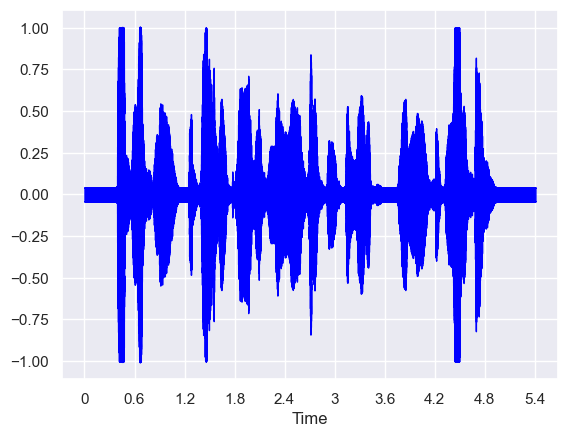

In [14]:
librosa.display.waveshow(audio_data, sr=sampling_rate, color="blue")

# Mel-frequency Cepstral Coefficients (MFCC)

In [15]:
mfcc = librosa.feature.mfcc(y=audio_data, sr=sampling_rate, n_mfcc=13)
mfcc.shape

(13, 233)

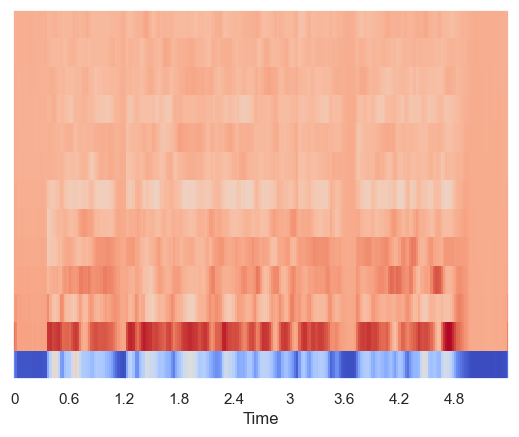

In [16]:
librosa.display.specshow(mfcc, x_axis='time')

# Save as image

In [17]:
def load_audio(path):
    # Load audio array
    audio_data, sampling_rate = librosa.load(path)
    return audio_data, sampling_rate

In [18]:
def save_plot(out_path, name):
    plt.axis('off')
    os.makedirs(out_path, exist_ok=True)
    file_out_path = os.path.join(out_path, f'{name}.png')
    plt.savefig(file_out_path)
    plt.clf()
    return file_out_path

In [19]:
def get_spectrogram_image(a_name, udio_data, sampling_rate, out_path):
    # Get spectrogram
    mfcc = librosa.feature.mfcc(y=audio_data, sr=sampling_rate, n_mfcc=13)
    librosa.display.specshow(mfcc, x_axis='time')
    
    # Save spectrogram
    spectrogram_out_path = os.path.join(out_path, 'spectrogram')
    file_out_path = save_plot(spectrogram_out_path, _name)
    return file_out_path

In [20]:
def get_wave_sound_image(_name, audio_data, sampling_rate, out_path):
    # Get wave show
    librosa.display.waveshow(audio_data, sr=sampling_rate, color="blue")

    # Save wave show
    wave_out_path = os.path.join(out_path, 'wave')
    file_out_path = save_plot(wave_out_path, _name)
    return file_out_path

In [21]:
FOLDER_NAME = 'audio_as_image'

In [22]:
wave_sound_paths, spectrogram_paths = [], []
for _, row in tqdm(df.iterrows(), total=len(df)):
    data_path = row.path
    _name = data_path.split('/')[-1][:-4]
    audio_data, sampling_rate = load_audio(data_path)

    wave_sound_out_path = get_wave_sound_image(
        _name, audio_data, sampling_rate, FOLDER_NAME
    )
    wave_sound_paths.append(wave_sound_out_path)

    spectrogram_out_path = get_spectrogram_image(
        _name, audio_data, sampling_rate, FOLDER_NAME
    )
    spectrogram_paths.append(spectrogram_out_path)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 480/480 [01:10<00:00,  6.80it/s]


<Figure size 640x480 with 0 Axes>

In [23]:
df['wave_sound_path'] = wave_sound_paths
df['spectrogram_path'] = spectrogram_paths
df

,path,label,wave_sound_path,spectrogram_path
0,speech_emotion_classification_dataset/JK_sa01.wav,sadness,audio_as_image/wave/JK_sa01.png,audio_as_image/spectrogram/JK_sa01.png
1,speech_emotion_classification_dataset/JK_sa15.wav,sadness,audio_as_image/wave/JK_sa15.png,audio_as_image/spectrogram/JK_sa15.png
2,speech_emotion_classification_dataset/DC_n13.wav,neutral,audio_as_image/wave/DC_n13.png,audio_as_image/spectrogram/DC_n13.png
3,speech_emotion_classification_dataset/DC_su09.wav,surprise,audio_as_image/wave/DC_su09.png,audio_as_image/spectrogram/DC_su09.png
4,speech_emotion_classification_dataset/DC_n07.wav,neutral,audio_as_image/wave/DC_n07.png,audio_as_image/spectrogram/DC_n07.png
...,...,...,...,...
475,speech_emotion_classification_dataset/JE_a01.wav,anger,audio_as_image/wave/JE_a01.png,audio_as_image/spectrogram/JE_a01.png
476,speech_emotion_classification_dataset/JE_a15.wav,anger,audio_as_image/wave/JE_a15.png,audio_as_image/spectrogram/JE_a15.png
477,speech_emotion_classification_dataset/DC_n22.wav,neutral,audio_as_image/wave/DC_n22.png,audio_as_image/spectrogram/DC_n22.png
478,speech_emotion_classification_dataset/DC_su04.wav,surprise,audio_as_image/wave/DC_su04.png,audio_as_image/spectrogram/DC_su04.png
